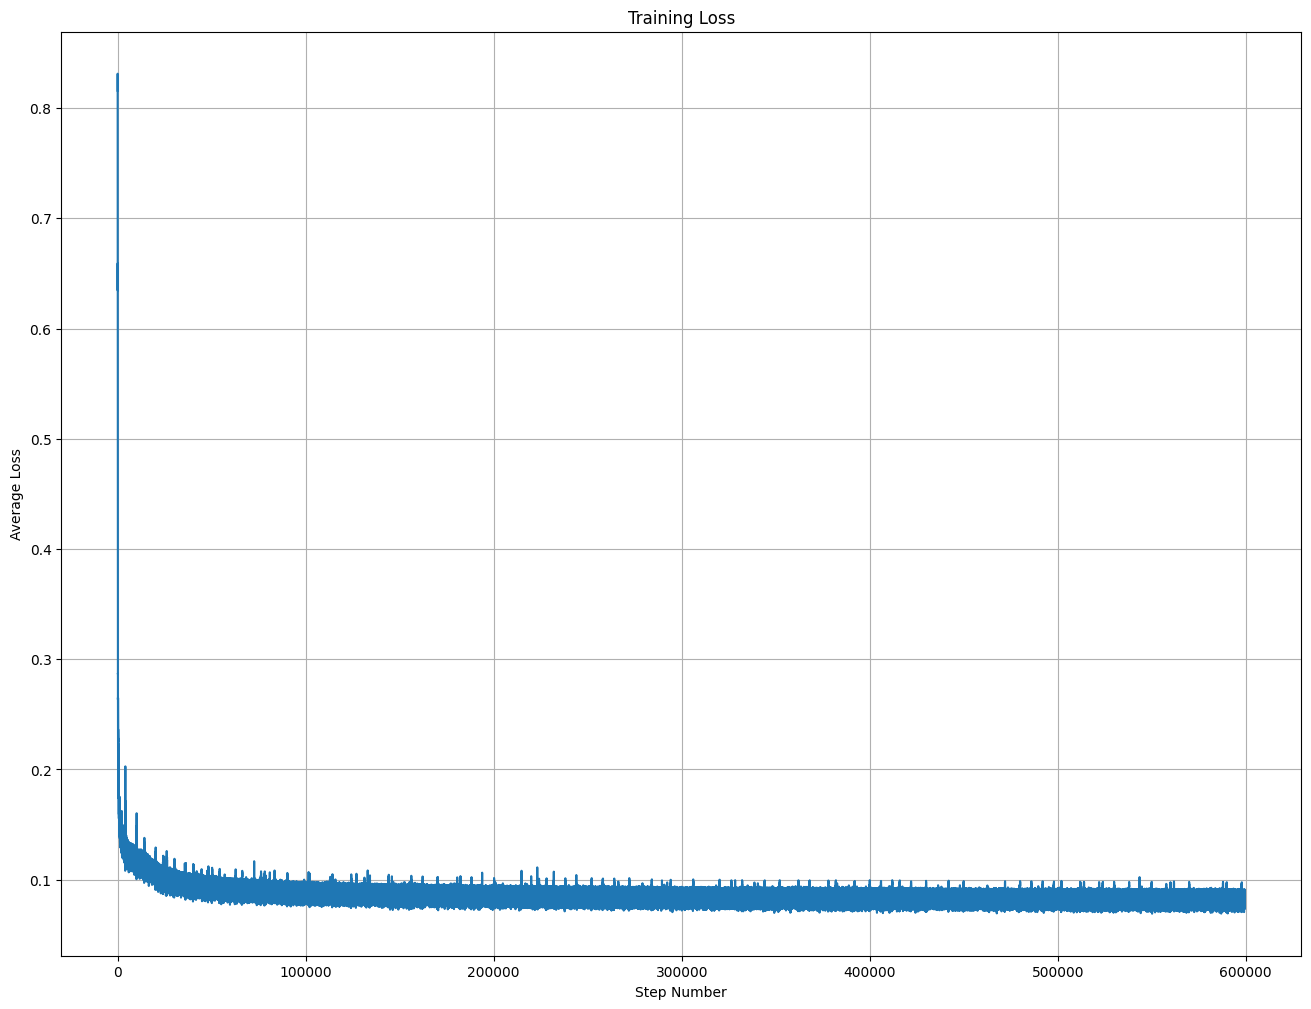

Training loss graph plotted successfully!


In [16]:
import re
import matplotlib.pyplot as plt

def process_loss_data(loss_text):
    """
    Extracts step numbers and average losses from a single line of loss data.

    Args:
        loss_text (str): A single line containing loss information (e.g., "Step 599921: avg_loss=0.08665").

    Returns:
        tuple: A tuple containing the step number (int) and average loss (float), or None if parsing fails.
    """

    step_pattern = re.compile(r"Step (\d+)")
    avg_loss_pattern = re.compile(r"avg_loss=([\d.]+)")

    step_match = step_pattern.search(loss_text)
    avg_loss_match = avg_loss_pattern.search(loss_text)

    if step_match and avg_loss_match:
        step_num = int(step_match.group(1))
        avg_loss = float(avg_loss_match.group(1))
        return step_num, avg_loss
    else:
        return None  # Handle lines that don't match the pattern

def process_loss_log(filepath):
    """
    Iterates through a text file containing loss data, extracts step numbers and
    average losses, and stores them in a dictionary.

    Args:
        filepath (str): Path to the text file.

    Returns:
        dict: Dictionary containing step numbers as keys and average losses as values.
    """

    avg_loss_dict = {}

    with open(filepath, 'r') as f:
        step = 0
        for line in f:
            step_num, avg_loss = process_loss_data(line.strip())  # Strip leading/trailing whitespace
            if step_num is not None or step%2 != 0:
                
                avg_loss_dict[step] = avg_loss
                step+=1

    return avg_loss_dict

def plot_loss(avg_loss_dict, title="Training Loss"):
    """
    Plots the average loss data from a dictionary.

    Args:
        avg_loss_dict (dict): Dictionary containing step numbers as keys and average losses as values.
        title (str, optional): Title for the plot. Defaults to "Training Loss".
    """

    steps = list(avg_loss_dict.keys())
    losses = list(avg_loss_dict.values())

    plt.figure(figsize=(16, 12))  # Adjust figure size as needed

    plt.plot(steps, losses, linestyle='-')
    plt.xlabel("Step Number")
    plt.ylabel("Average Loss")
    plt.title(title)
    plt.grid(True)
    plt.show()

# Example usage
loss_log_path = "loss_file.txt"

avg_loss_dict = process_loss_log(loss_log_path)
plot_loss(avg_loss_dict)

print("Training loss graph plotted successfully!")
